**<font size='5'> Task 2: PREDICTIVE MODELING OF CUSTOMER BOOKINGS </font>**


# Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [1]:
import pandas as pd
import numpy as np

import matplotlib as plt
import plotly.express as px
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("./customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 



To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking



In [7]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


array([[<AxesSubplot:title={'center':'num_passengers'}>,
        <AxesSubplot:title={'center':'purchase_lead'}>,
        <AxesSubplot:title={'center':'length_of_stay'}>],
       [<AxesSubplot:title={'center':'flight_hour'}>,
        <AxesSubplot:title={'center':'flight_day'}>,
        <AxesSubplot:title={'center':'wants_extra_baggage'}>],
       [<AxesSubplot:title={'center':'wants_preferred_seat'}>,
        <AxesSubplot:title={'center':'wants_in_flight_meals'}>,
        <AxesSubplot:title={'center':'flight_duration'}>],
       [<AxesSubplot:title={'center':'booking_complete'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

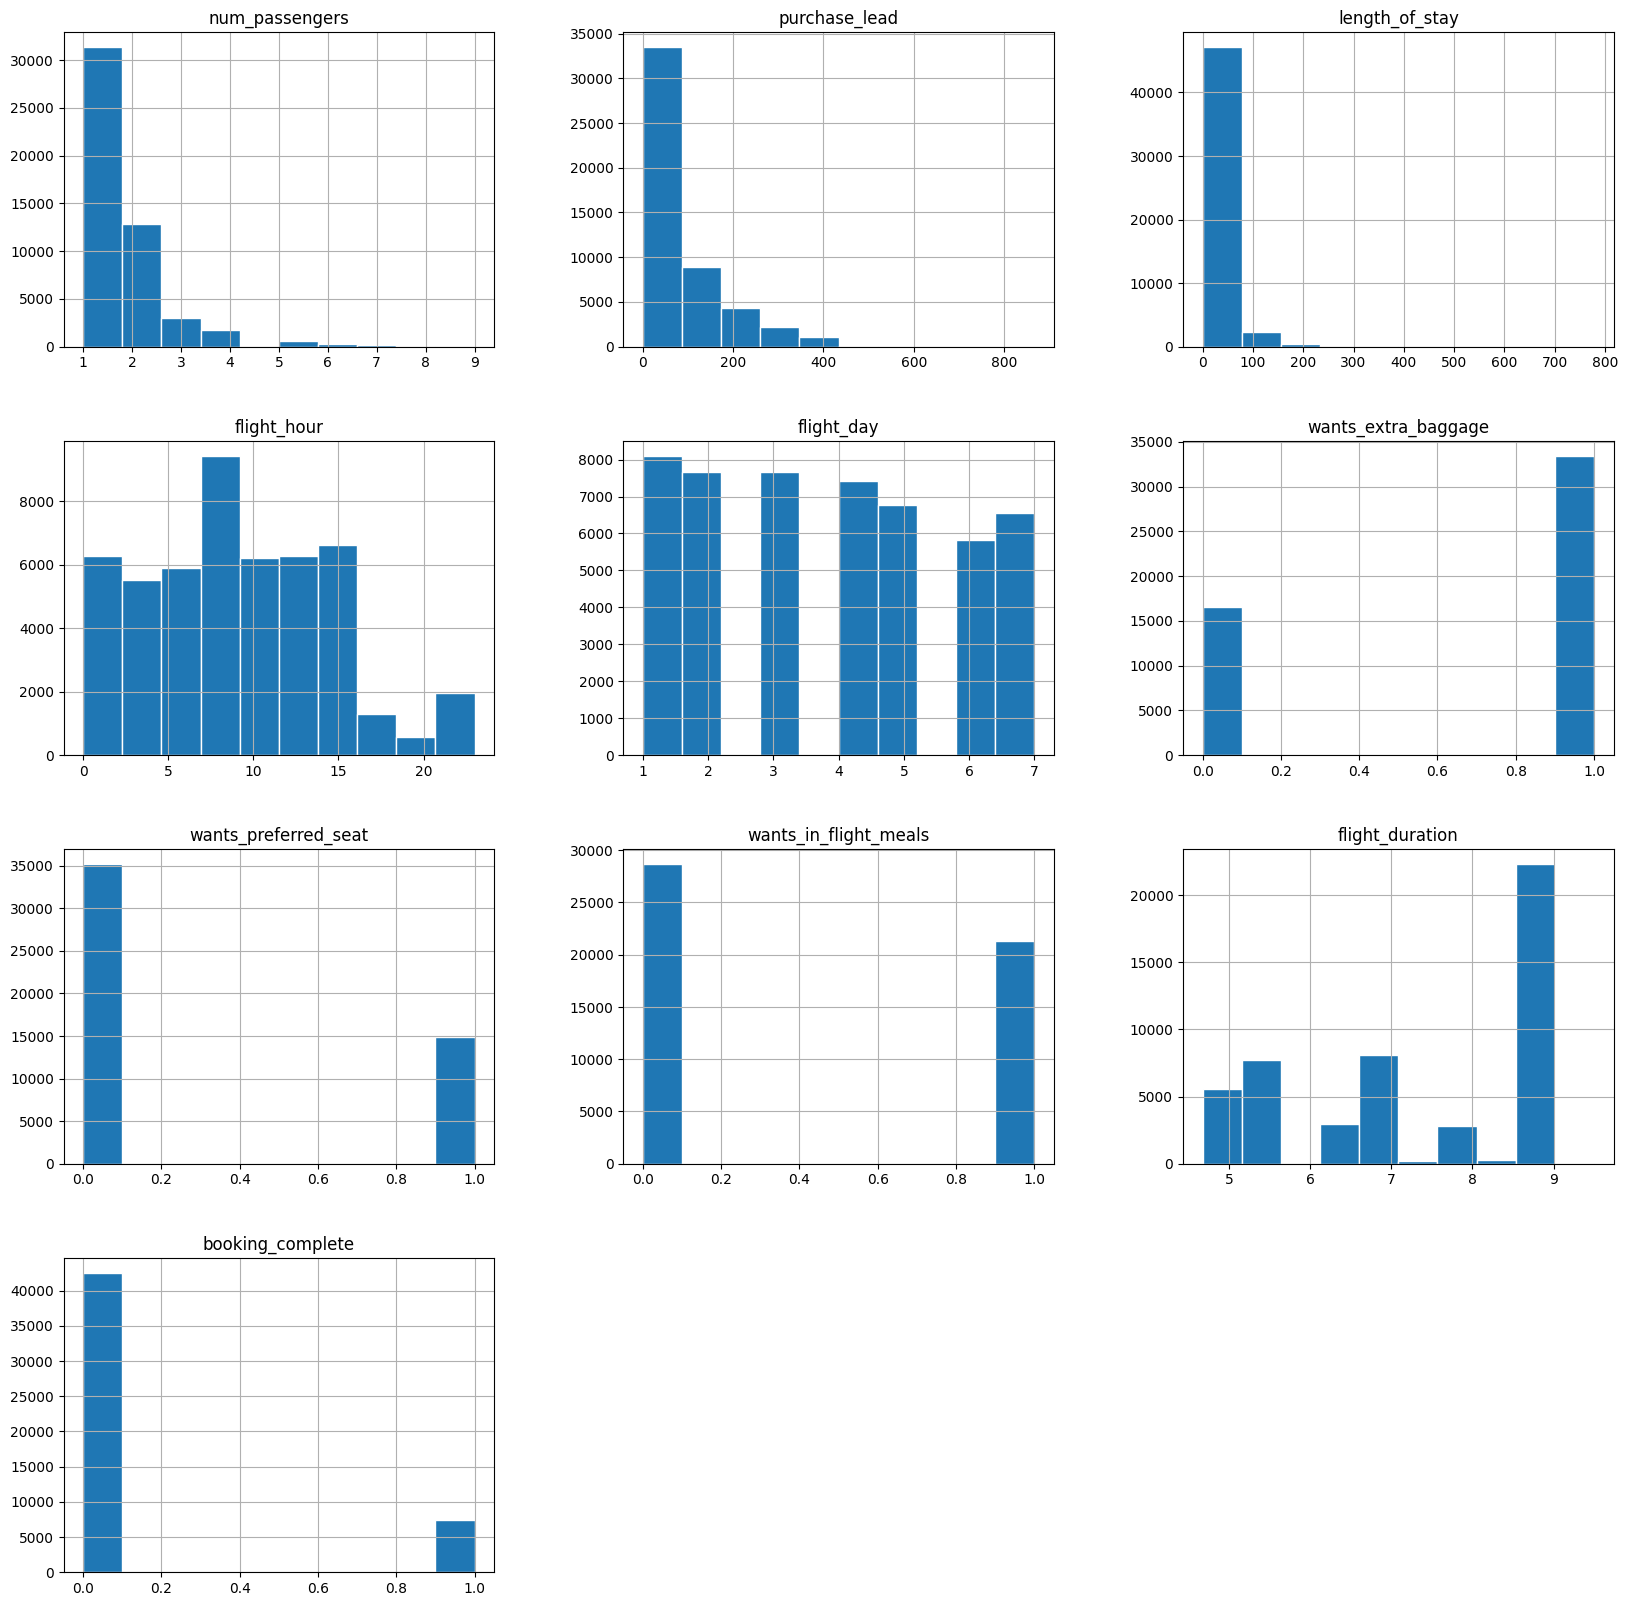

In [19]:
df.hist(edgecolor='white', figsize=(20,20))

In [20]:
df.groupby('booking_complete').mean().T

booking_complete,0,1
num_passengers,1.580923,1.649906
purchase_lead,85.779926,80.167157
length_of_stay,23.647218,19.617679
flight_hour,9.050162,9.158331
flight_day,3.820258,3.781225
wants_extra_baggage,0.655331,0.745253
wants_preferred_seat,0.287357,0.351565
wants_in_flight_meals,0.421641,0.458411
flight_duration,7.344266,6.898258


In [21]:
df['route'].value_counts()

AKLKUL    2680
PENTPE     924
MELSGN     842
ICNSIN     801
DMKKIX     744
          ... 
LBUTPE       1
CXRMEL       1
DELKBR       1
KOSSYD       1
MRUXIY       1
Name: route, Length: 799, dtype: int64

In [22]:
df['booking_origin'].value_counts()

Australia               17872
Malaysia                 7174
South Korea              4559
Japan                    3885
China                    3387
                        ...  
Panama                      1
Tonga                       1
Tanzania                    1
Bulgaria                    1
Svalbard & Jan Mayen        1
Name: booking_origin, Length: 104, dtype: int64

# Feature enigeering
Let's convert type of some variables: flight_day, sale_channels and trip_type as well.

In [4]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [5]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [6]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [26]:
df['sales_channel'].value_counts()

Internet    44382
Mobile       5618
Name: sales_channel, dtype: int64

In [29]:
df = pd.get_dummies(df, columns=['sales_channel'], prefix = 'channel')

In [27]:
df['trip_type'].value_counts()

RoundTrip     49497
OneWay          387
CircleTrip      116
Name: trip_type, dtype: int64

In [28]:
map_ = {'CircleTrip' : 'RoundTrip'}
df['trip_type'].replace(map_, inplace=True)

In [30]:
df = pd.get_dummies(df, columns=['trip_type'], prefix = 'type')

In [31]:
df.head(2)

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,channel_Internet,channel_Mobile,type_OneWay,type_RoundTrip
0,2,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0,1,0,0,1
1,1,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0,1,0,0,1


# Building model

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   purchase_lead          50000 non-null  int64  
 2   length_of_stay         50000 non-null  int64  
 3   flight_hour            50000 non-null  int64  
 4   flight_day             50000 non-null  int64  
 5   route                  50000 non-null  object 
 6   booking_origin         50000 non-null  object 
 7   wants_extra_baggage    50000 non-null  int64  
 8   wants_preferred_seat   50000 non-null  int64  
 9   wants_in_flight_meals  50000 non-null  int64  
 10  flight_duration        50000 non-null  float64
 11  booking_complete       50000 non-null  int64  
 12  channel_Internet       50000 non-null  uint8  
 13  channel_Mobile         50000 non-null  uint8  
 14  type_OneWay            50000 non-null  uint8  
 15  ty

In [34]:
num = df.select_dtypes(include=['int64', 'float64','uint8'])

In [35]:
num.head(2)

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,channel_Internet,channel_Mobile,type_OneWay,type_RoundTrip
0,2,262,19,7,6,1,0,0,5.52,0,1,0,0,1
1,1,112,20,3,6,0,0,0,5.52,0,1,0,0,1


In [36]:
X = num.drop('booking_complete', axis=1)
y = num['booking_complete']

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 30, random_state=9)

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
rand_forest = RandomForestClassifier(n_estimators=100, random_state=42)

In [41]:
rand_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [42]:
rand_forest

RandomForestClassifier(random_state=42)

In [43]:
y_pred = rand_forest.predict(X_test)

In [44]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91        26
           1       0.00      0.00      0.00         4

    accuracy                           0.83        30
   macro avg       0.43      0.48      0.45        30
weighted avg       0.75      0.83      0.79        30



In [46]:
cross_validate(rand_forest, X_test, y_test, cv=10)

{'fit_time': array([0.08572006, 0.14830613, 0.09418988, 0.14857745, 0.13819575,
        0.08272338, 0.08073044, 0.11773992, 0.12390685, 0.15698218]),
 'score_time': array([0.0109787 , 0.01694441, 0.00996661, 0.01092911, 0.00797343,
        0.00697637, 0.00697637, 0.01601458, 0.01705885, 0.01000905]),
 'test_score': array([0.66666667, 1.        , 1.        , 1.        , 1.        ,
        1.        , 0.66666667, 0.66666667, 0.66666667, 0.66666667])}

In [48]:
scoring = {'acc': 'accuracy',
              'prec_macro':'precision_macro',
              'rec_macro':'recall_macro',
              'f1_macro': 'f1_macro'}
scores = cross_validate(rand_forest, X_train, y_train, cv=10,
                             scoring=scoring)
scores

{'fit_time': array([4.59982228, 4.58838916, 4.56651974, 4.00632238, 4.19716763,
        4.16555238, 4.42407179, 4.14920926, 4.30931258, 4.08727503]),
 'score_time': array([0.16139817, 0.1291759 , 0.17872691, 0.13757467, 0.13255048,
        0.15925074, 0.12750626, 0.14762807, 0.2013433 , 0.15054226]),
 'test_acc': array([0.8465079 , 0.84790875, 0.84770863, 0.84470682, 0.85051031,
        0.84750851, 0.84710826, 0.84630778, 0.84750851, 0.85051031]),
 'test_prec_macro': array([0.64325364, 0.64359294, 0.64445403, 0.6114822 , 0.67927329,
        0.63929939, 0.63930295, 0.6308648 , 0.63929939, 0.67905336]),
 'test_rec_macro': array([0.52915832, 0.51951733, 0.52160276, 0.51818531, 0.53089503,
        0.52085487, 0.52337806, 0.52235578, 0.52085487, 0.52923994]),
 'test_f1_macro': array([0.52261647, 0.50396077, 0.5081149 , 0.50321668, 0.52430538,
        0.50693885, 0.51193486, 0.51041603, 0.50693885, 0.52127378])}

In [49]:
def C_metrics_train(model,X_train,y_train):
    scoring = {'acc': 'accuracy',
              'prec_macro':'precision_macro',
              'rec_macro':'recall_macro',
              'f1_macro': 'f1_macro'}
    scores = cross_validate(model, X_train, y_train, cv=10,
                             scoring=scoring)
    ypredTrain = model.predict(X_train)
    Acc_train = scores['test_acc'].mean()
    Precision_train = scores['test_prec_macro'].mean()
    Recall_train = scores['test_rec_macro'].mean()
    F1_train = scores['test_f1_macro'].mean()
    conf_matrix_train = confusion_matrix(y_train, ypredTrain)
    
    from sklearn.metrics import classification_report
    
    statist_train = []
    
    list_metrics = [Acc_train, Precision_train, Recall_train, F1_train]
    statist_train.append(list_metrics)
    statist_train = pd.DataFrame(statist_train, columns=['Accuracy', 'Precision','Recall','F1'], index=['Train'])
    
    print('Train results')
    print('----------------------------------------')
    print('Confusion Matrix \n', conf_matrix_train)
    return statist_train
    
    


In [50]:
C_metrics_train(rand_forest, X_train, y_train)

Train results
----------------------------------------
Confusion Matrix 
 [[42492     4]
 [   20  7454]]


,Accuracy,Precision,Recall,F1
Train,0.847629,0.644988,0.523604,0.511972


In [51]:
def C_metrics_test(model,X_test, y_test):
    scoring = {'acc':'accuracy',
              'pre_macro':'precision_macro',
              'rec_macro':'recall_macro',
              'f1_macro':'f1_macro'}
    
    scores = cross_validate(model,X_test,y_test,cv=10,scoring=scoring)
    ypredTest = model.predict(X_test)
    report = classification_report(y_test, ypredTest, zero_division=0, output_dict=True)
    report = pd.DataFrame(report).T
    
    Acc_test = report.loc['accuracy',:].mean()
    Rest_metrics = report.iloc[:-3,:]
    
    Precision_test = Rest_metrics.loc[:,'precision'].mean()
    Recall_test = Rest_metrics.loc[:,'recall'].mean()
    F1_test = Rest_metrics.loc[:,'f1-score'].mean()
    conf_matrix_test = confusion_matrix(y_test,ypredTest)
    
    statist_test = []
    
    list_metrics = [Acc_test, Precision_test, Recall_test, F1_test]
    statist_test.append(list_metrics)
    statist_test = pd.DataFrame(statist_test, columns = ['Accuracy', 'Precision','Recall','F1'], index = ['Test'])
    
    print ('Test result')
    print('--------------------------------')
    print('Confusion Matrix \n', conf_matrix_test)
    print('Classification report \n', Rest_metrics)
    return statist_test
   

    

In [52]:
C_metrics_test(rand_forest, X_test, y_test)

Test result
--------------------------------
Confusion Matrix 
 [[25  1]
 [ 4  0]]
Classification report 
    precision    recall  f1-score  support
0   0.862069  0.961538  0.909091     26.0
1   0.000000  0.000000  0.000000      4.0


,Accuracy,Precision,Recall,F1
Test,0.833333,0.431034,0.480769,0.454545


In [53]:
def C_Allmetrics (model, X_train, y_train, X_test, y_test):
    stats_train = C_metrics_train(model, X_train, y_train)
    stats_test = C_metrics_test(model, X_test, y_test)
    final_metrics = pd.concat([stats_train, stats_test])
    
    print('+++++++++++Summary of the Metrics+++++++++++++')
    print(final_metrics)
    return final_metrics


In [54]:
C_Allmetrics(rand_forest, X_train, y_train, X_test, y_test)

Train results
----------------------------------------
Confusion Matrix 
 [[42492     4]
 [   20  7454]]
Test result
--------------------------------
Confusion Matrix 
 [[25  1]
 [ 4  0]]
Classification report 
    precision    recall  f1-score  support
0   0.862069  0.961538  0.909091     26.0
1   0.000000  0.000000  0.000000      4.0
+++++++++++Summary of the Metrics+++++++++++++
       Accuracy  Precision    Recall        F1
Train  0.847629   0.644988  0.523604  0.511972
Test   0.833333   0.431034  0.480769  0.454545


,Accuracy,Precision,Recall,F1
Train,0.847629,0.644988,0.523604,0.511972
Test,0.833333,0.431034,0.480769,0.454545


The value of accuracy metric is high. But the other metrics are rather low. The hypertunning should be applied, essential features should be added.
But for now, we can use this model, and I will check again how the variables effect booking-complete.

In [55]:
book=df[df['booking_complete']==1]
book.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,channel_Internet,channel_Mobile,type_OneWay,type_RoundTrip
82,1,15,31,17,1,AKLKUL,Malaysia,0,0,0,8.83,1,1,0,0,1
86,1,156,19,14,1,AKLKUL,Malaysia,1,0,0,8.83,1,1,0,0,1
94,1,181,87,2,2,AKLKUL,Singapore,1,0,1,8.83,1,1,0,0,1
109,1,127,17,16,2,AKLKUL,Malaysia,1,0,1,8.83,1,0,1,0,1
122,1,42,17,14,2,AKLKUL,Malaysia,0,0,0,8.83,1,1,0,0,1


array([[<AxesSubplot:title={'center':'num_passengers'}>,
        <AxesSubplot:title={'center':'purchase_lead'}>,
        <AxesSubplot:title={'center':'length_of_stay'}>,
        <AxesSubplot:title={'center':'flight_hour'}>],
       [<AxesSubplot:title={'center':'flight_day'}>,
        <AxesSubplot:title={'center':'wants_extra_baggage'}>,
        <AxesSubplot:title={'center':'wants_preferred_seat'}>,
        <AxesSubplot:title={'center':'wants_in_flight_meals'}>],
       [<AxesSubplot:title={'center':'flight_duration'}>,
        <AxesSubplot:title={'center':'booking_complete'}>,
        <AxesSubplot:title={'center':'channel_Internet'}>,
        <AxesSubplot:title={'center':'channel_Mobile'}>],
       [<AxesSubplot:title={'center':'type_OneWay'}>,
        <AxesSubplot:title={'center':'type_RoundTrip'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

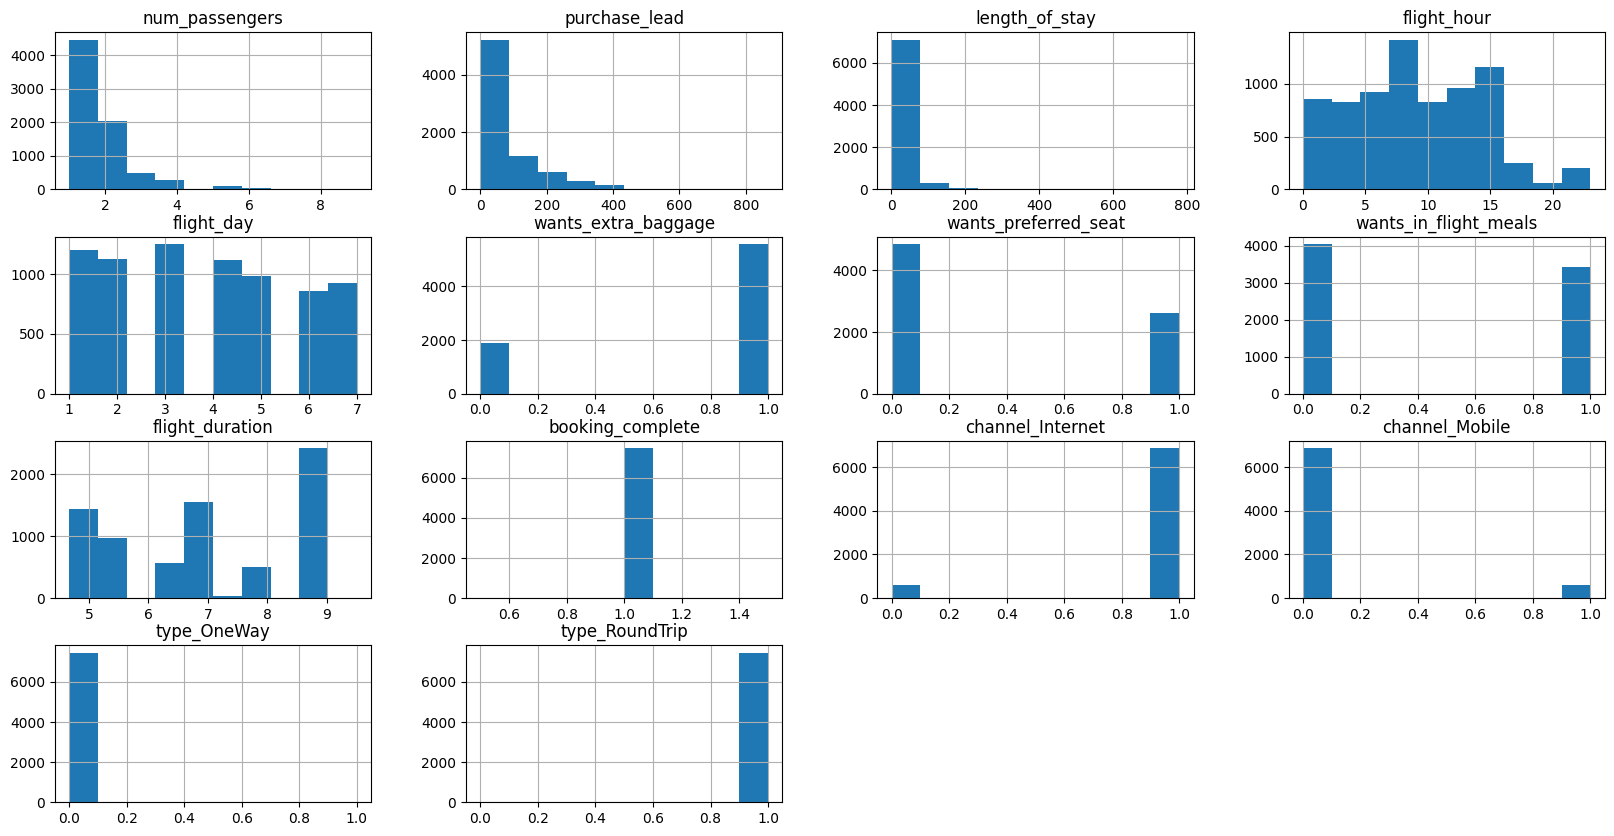

In [56]:
book.hist(figsize=(20,10))

In [57]:
book['num_passengers'].value_counts(normalize=True)*100

1    59.574753
2    27.427120
3     6.565927
4     3.677454
5     1.457609
6     0.722118
7     0.240706
9     0.173843
8     0.160471
Name: num_passengers, dtype: float64

In [58]:
book['length_of_stay'].value_counts(normalize=True)*100

6      21.569938
5      18.320407
4      13.894089
3       6.766515
17      2.634394
         ...    
123     0.013373
242     0.013373
369     0.013373
233     0.013373
167     0.013373
Name: length_of_stay, Length: 180, dtype: float64

In [59]:
book['channel_Internet'].value_counts(normalize=True)*100

1    91.856111
0     8.143889
Name: channel_Internet, dtype: float64

In [60]:
book['type_RoundTrip'].value_counts(normalize=True)*100

1    99.732549
0     0.267451
Name: type_RoundTrip, dtype: float64

In [61]:
book['wants_extra_baggage'].value_counts(normalize=True)*100

1    74.525274
0    25.474726
Name: wants_extra_baggage, dtype: float64

In [62]:
book.columns

Index(['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour',
       'flight_day', 'route', 'booking_origin', 'wants_extra_baggage',
       'wants_preferred_seat', 'wants_in_flight_meals', 'flight_duration',
       'booking_complete', 'channel_Internet', 'channel_Mobile', 'type_OneWay',
       'type_RoundTrip'],
      dtype='object')

In [63]:
rand_forest.feature_importances_

array([0.05739855, 0.29691725, 0.16459064, 0.1963992 , 0.1119806 ,
       0.01258596, 0.01306953, 0.02107301, 0.11706987, 0.0036034 ,
       0.00361514, 0.00084893, 0.00084793])

In [73]:
fi = pd.DataFrame(data = rand_forest.feature_importances_, 
                  index = rand_forest.feature_names_in_,                   
                  columns = ['importance'])
fi = fi.sort_values(by = 'importance', ascending=True)
fi


,importance
type_RoundTrip,0.000848
type_OneWay,0.000849
channel_Internet,0.003603
channel_Mobile,0.003615
wants_extra_baggage,0.012586
wants_preferred_seat,0.013070
wants_in_flight_meals,0.021073
num_passengers,0.057399
flight_day,0.111981
flight_duration,0.117070


<AxesSubplot:title={'center':'Feature Importance'}>

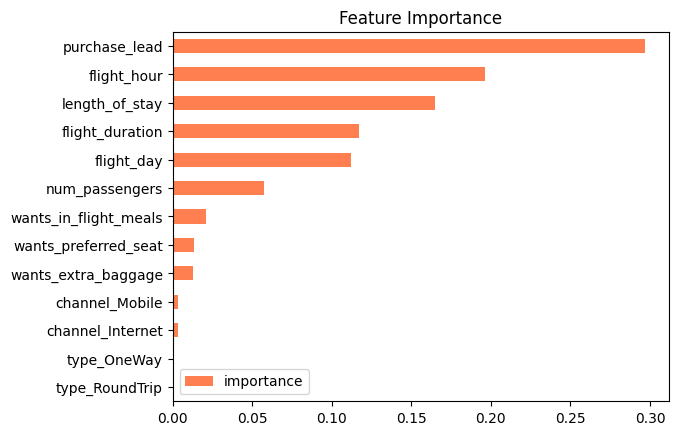

In [71]:
fi.plot(kind='barh', title = 'Feature Importance', color = 'coral')

Purchase_lead (number days between traveling date and booking date is the most important feature. Information about the flight (flight_hour) is also important. Type of flight (oneway or roundtrip) and channel of booking (Internet or Mobile) is the least important.
